In [4]:
import os
from PIL import Image
import numpy as np
from scipy import misc
import random
import shutil
import matplotlib
import matplotlib.pyplot as plt


import tensorflow as tf

# Download ImageNet Images

**Clone [ImageNet_Utils](https://github.com/tzutalin/ImageNet_Utils) repository**
```
git clone git@github.com:tzutalin/ImageNet_Utils.git
```


**Download Images given wnid**
```
cd ImageNet_Utils
./downloadutils.py --downloadImages --wnid n02472987
```

In [5]:
classes = {"dog":"n02084071",
           "human": "n02472987",
           "car": "n02958343",
           "house": "n03544360"}

In [6]:
BASE_DIR = "/home/karen/Downloads/data/ImageNet_Utils"
get_class_path = lambda name: os.path.join(BASE_DIR, classes[name], "{}_urlimages".format(classes[name]))

# Plot Image Pixel Distribution

In [7]:
def plot_pixel_distribution(img_file_path):
    # load image
    img = misc.imread(img_file_path)

    # figure size
    fig = plt.figure(figsize=(16, 8))

    # plot image
    fig.add_subplot(1, 2, 1)
    plt.title("Image")
    plt.imshow(img)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

    # plot hitogram
    fig.add_subplot(1, 2, 2)
    plt.title("Histogram")
    plt.hist(img.flatten())

    plt.show()

# Example of Good Image

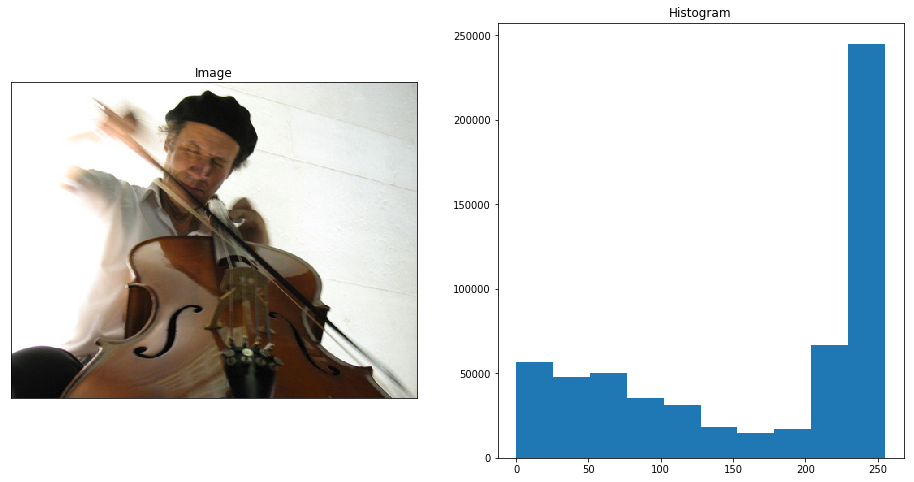

In [9]:
g_image = "542007951_00240f3f6a.jpg"
plot_pixel_distribution(os.path.join(get_class_path("human"), g_image))

# Example of Bad Image

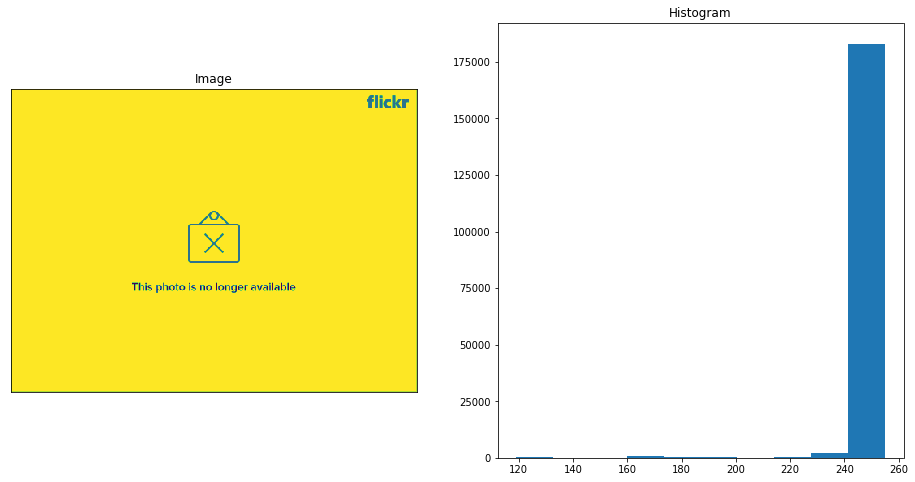

In [10]:
b_image = "1824736_a744fd42ee.jpg"
plot_pixel_distribution(os.path.join(get_class_path("dog"), b_image))

# Filter Bad Images

In [11]:
def filtered_images(images):
    
    good_images = []
    bad_images = []
    
    for filename in images:
        try:
            img = Image.open(filename)
            # pixel distribution
            v = img.histogram()
            h, w = img.size
            percentage_monochrome = max(v) / float(h*w)
            
            # filter bad and small images
            if percentage_monochrome > 0.8 or h < 300 or w <300:
                bad_images.append(filename)
            else:
                good_images.append(filename)
        except:
            pass
    
    print("Number of good images: {}\n".format(len(good_images)))
    print("Number of bad images: {}\n".format(len(bad_images)))
    return good_images, bad_images       

# Filter Dog Images

In [22]:
class_dir = get_class_path("dog")
# os.listdir(class_dir) --> subdir inside class_dir
dog_images = map(lambda f: os.path.join(class_dir, f), os.listdir(class_dir))
# # filter dog images
g_images, b_images = filtered_images(dog_images)

Number of good images: 409

Number of bad images: 96



# Plot Bad Images

In [18]:
def plot_image_grid(images_files):
    # figure size
    fig = plt.figure(figsize=(8, 8))
    
    # load images
    images = [tf.contrib.keras.preprocessing.image.load_img(img) for img in images_files]
    
    # plot image grid
    for x in range(4):
        for y in range(4):
            ax = fig.add_subplot(4, 4, 4*y+x+1)
            plt.imshow(images[4*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

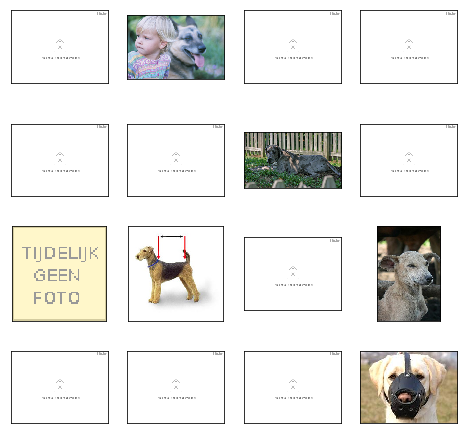

In [19]:
# plot bad images
plot_image_grid(b_images[:16])

# Filter and Explore Every Classes

Class Name: human

Number of good images: 1208

Number of bad images: 242



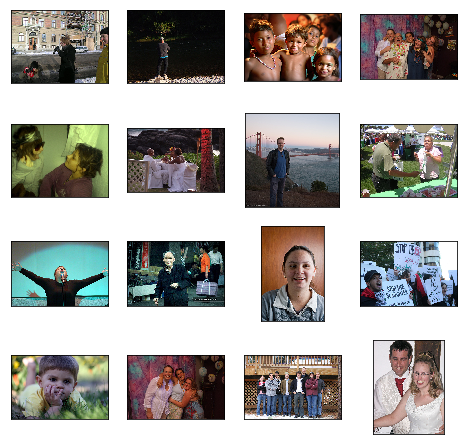

Class Name: house

Number of good images: 549

Number of bad images: 172



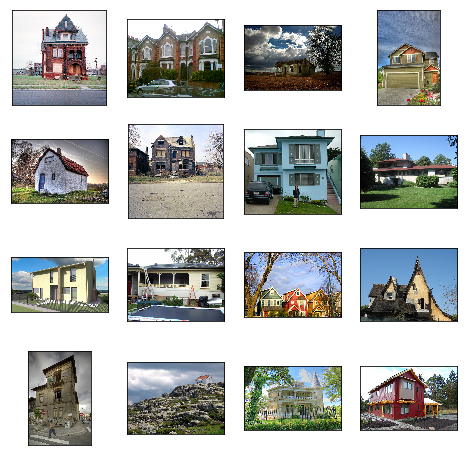

Class Name: dog

Number of good images: 409

Number of bad images: 96



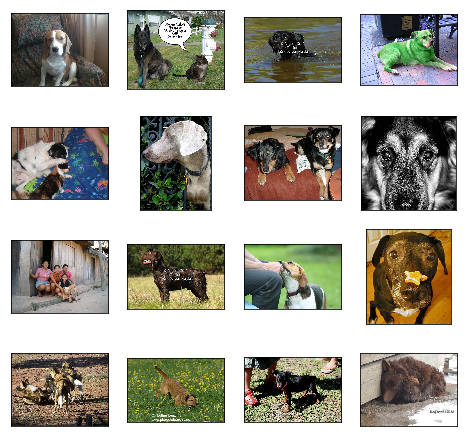

Class Name: car

Number of good images: 781

Number of bad images: 203



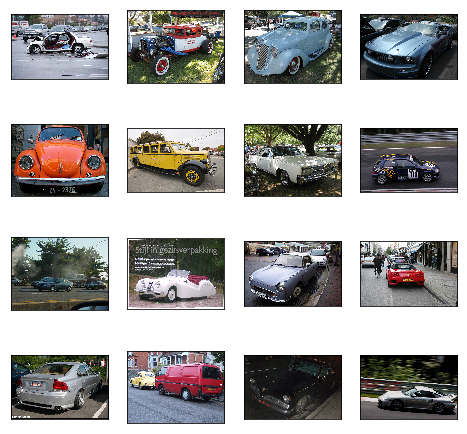

In [26]:
data_dic = {}
for class_name, wind_number in classes.items():
    
    print("Class Name: {}\n".format(class_name))
    class_dir = get_class_path(class_name) # eg: /home/karen/Downloads/data/ImageNet_Utils/n02084071/n02084071_urlimages
    class_images = map(lambda f: os.path.join(class_dir, f), os.listdir(class_dir)) # eg: /home/karen/Downloads/data/ImageNet_Utils/n02084071/n02084071_urlimages/perro.jpg0wywr1.jpg
    
    g_images, b_images = filtered_images(class_images)

    random.shuffle(g_images)
    data_dic[class_name] = g_images
    
    plot_image_grid(g_images[:16])

# Split Into Train and Validation Sets


In [27]:
# Create new directory and copy files to it
def copy_files_to_directory(files, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        # print("Created directory: {}".format(directory))

    for f in files:
        shutil.copy(f, directory)
    # print("Copied {} files.\n".format(len(files)))

In [28]:
def train_validation_split(base_dir, data_dic, split_ratio=0.3):
    IMAGENET_DATASET = os.path.join(base_dir,"imageNet_dataset")

    if not os.path.exists(IMAGENET_DATASET):
        os.makedirs(IMAGENET_DATASET)

    for class_name, imgs in data_dic.items():
        idx_split = int(len(imgs) * split_ratio)
        random.shuffle(imgs)
        validation = imgs[:idx_split]
        train = imgs[idx_split:]

        copy_files_to_directory(train, os.path.join(IMAGENET_DATASET,"train",class_name))
        copy_files_to_directory(validation, os.path.join(IMAGENET_DATASET,"validation",class_name))

In [29]:
# split data into train and validation
train_validation_split(BASE_DIR, data_dic, split_ratio=0.3)

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/train/human
Copied 846 files.

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/validation/human
Copied 362 files.

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/train/house
Copied 385 files.

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/validation/house
Copied 164 files.

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/train/dog
Copied 287 files.

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/validation/dog
Copied 122 files.

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/train/car
Copied 547 files.

Created directory: /home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/validation/car
Copied 234 files.



In [30]:
os.listdir('/home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/')

['validation', 'train']

In [37]:
sub_dir=os.listdir('/home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/train/')
sub_dir

['car', 'house', 'dog', 'human']

In [40]:
for i in sub_dir:
    DIR='/home/karen/Downloads/data/ImageNet_Utils/imageNet_dataset/train/{}/'.format(i)
    num_pics=len(os.listdir(DIR))
    print(num_pics, "pics in train class", i)

547 pics in train class car
385 pics in train class house
287 pics in train class dog
846 pics in train class human
